In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('salary_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,Company_txt,job_state,same_state,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,50,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,39,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,13,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,58,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,25,1,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data science' in title.lower():
        return 'data science'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:
df['title_simp'] = df['Job Title'].apply(title_simplifier)
df['title_simp'].value_counts()

na               433
data engineer    119
analyst          101
data science      36
mle               29
manager           19
director           5
Name: title_simp, dtype: int64

In [7]:
df['seniority'] = df['Job Title'].apply(seniority)
df['seniority'].value_counts()

na        519
senior    220
jr          3
Name: seniority, dtype: int64

In [12]:
# Fix job_state 'Los Angeles'

df['job_state'] = df['job_state'].apply(lambda x : x.strip() if 'los angeles' != x.lower().strip() else 'LA')
#df.job_state.value_counts()

In [13]:
# Job description length

df['desc_length'] = df['Job Description'].apply(lambda x : len(x))

In [15]:
# Compititors numbers

df['num_comp'] = df['Competitors'].apply(lambda x : len(x.split(',')) if x != '-1' else 0)
df['num_comp'].value_counts()

0    460
3    228
2     41
1     12
4      1
Name: num_comp, dtype: int64

In [17]:
# hourly wage to annual

df['min_salary'] = df.apply(lambda x : x['min_salary']*2 if x['hourly'] == 1 else  x['min_salary'] , axis=1)
df['max_salary'] = df.apply(lambda x : x['max_salary']*2 if x['hourly'] == 1 else  x['max_salary'] , axis=1)

In [19]:
# company text cleaning

df['Company_txt'] = df['Company_txt'].apply(lambda x : x.replace('\n', ''))

<AxesSubplot:>

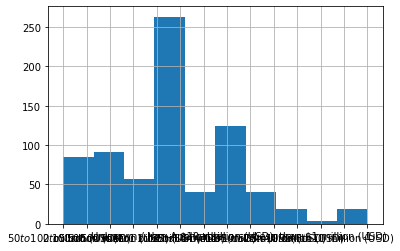

In [21]:
df.Revenue.hist()

<AxesSubplot:>

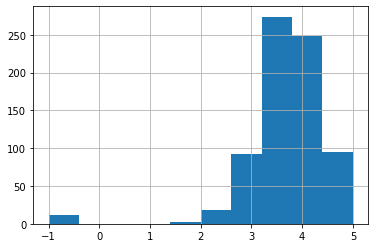

In [22]:
df.Rating.hist()

<AxesSubplot:>

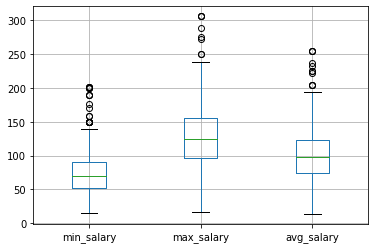

In [27]:
df.boxplot(column=['min_salary', 'max_salary', 'avg_salary'])

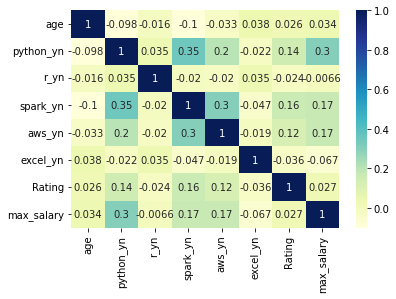

In [34]:
# plotting correlation heatmap
dataplot = sns.heatmap(df[['age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'seniority', 'Rating', 'max_salary']].corr(), cmap="YlGnBu", annot=True)

In [20]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'title_simp', 'seniority',
       'desc_length', 'num_comp'],
      dtype='object')

In [35]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector','Revenue',
       'Company_txt', 'job_state', 'python_yn', 'r_yn','spark_yn', 'aws_yn', 'excel_yn', 'title_simp', 'seniority']]

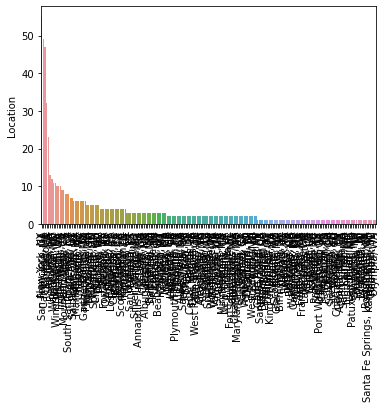

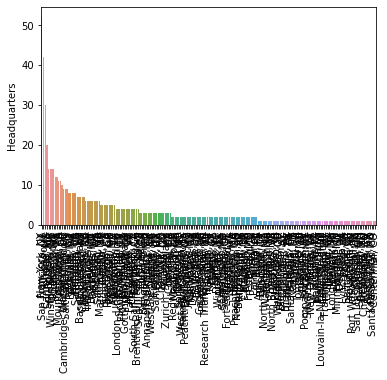

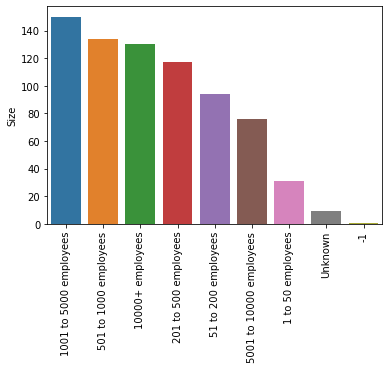

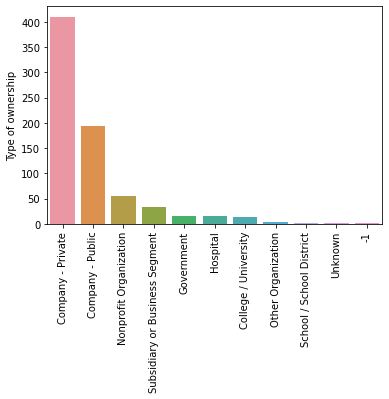

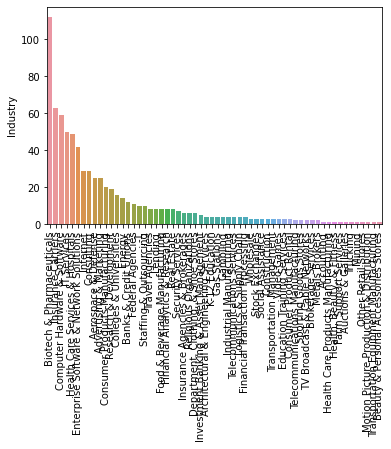

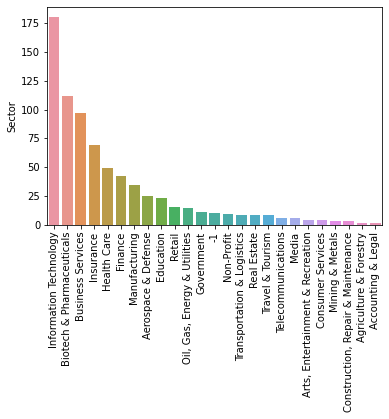

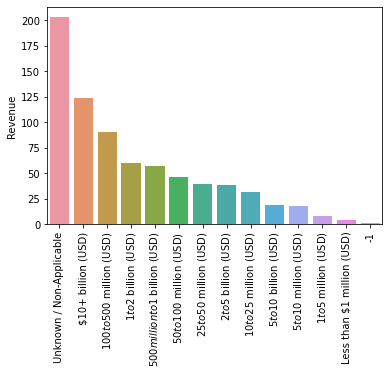

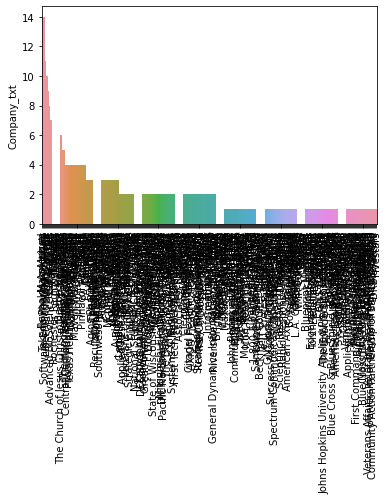

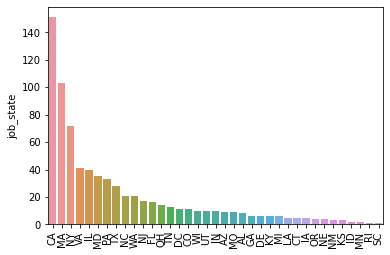

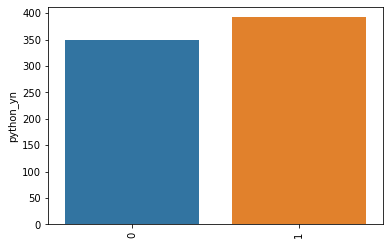

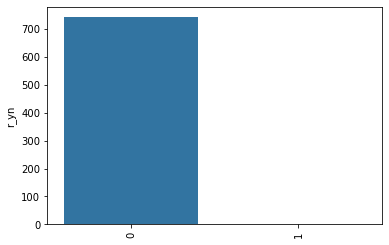

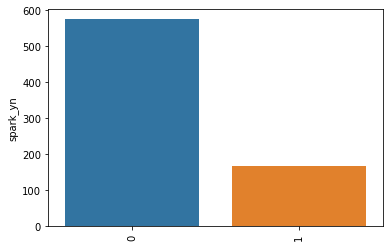

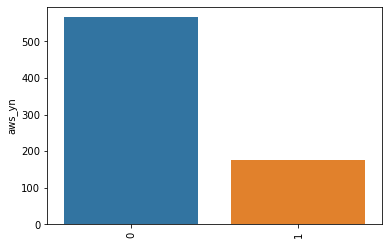

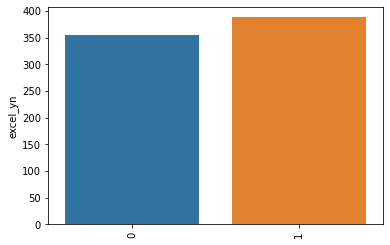

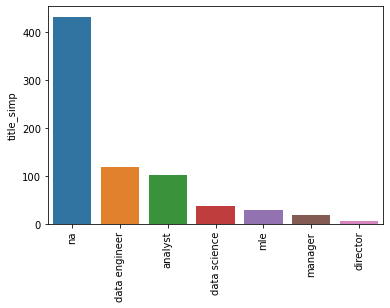

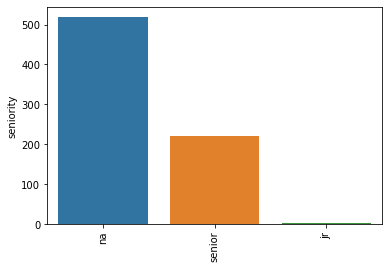

In [40]:
# bar plot fpr categorical data
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

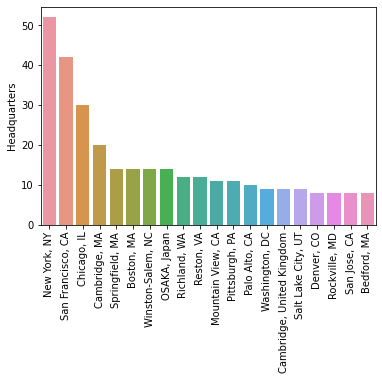

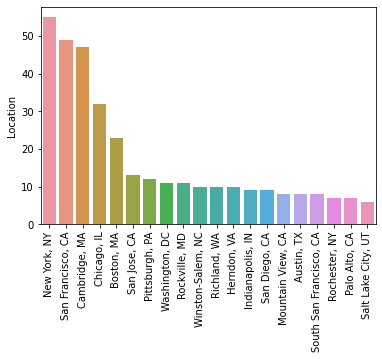

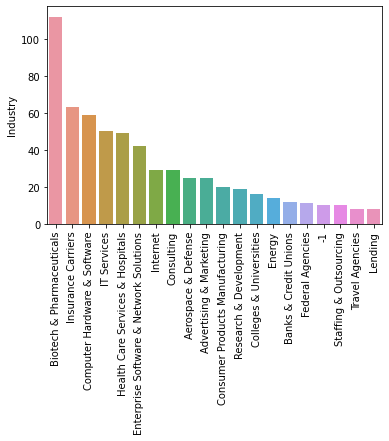

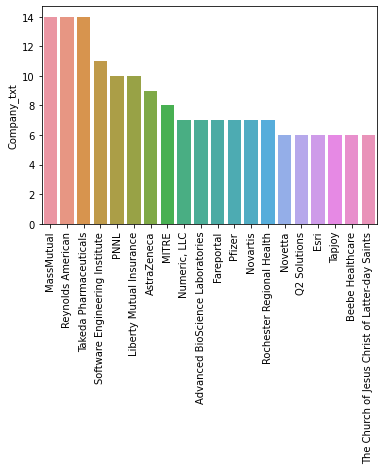

In [43]:
# bar plot fpr categorical data
for i in df_cat[['Headquarters', 'Location', 'Industry', 'Company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [51]:
pd.pivot_table(df, index='title_simp', values='avg_salary')

,avg_salary
title_simp,
analyst,65.836634
data engineer,105.403361
data science,123.736111
director,130.800000
manager,87.026316
mle,118.655172
na,104.547344


In [52]:
pd.pivot_table(df, index=['title_simp', 'seniority'], values='avg_salary')

avg_salary
title_simp    seniority            
analyst       jr          53.250000
              na          61.215278
              senior      79.092593
data engineer na          96.701220
              senior     124.689189
data science  na         131.410714
              senior      96.875000
director      na         130.800000
manager       na          77.558824
              senior     167.500000
mle           na         113.947368
              senior     127.600000
na            jr         106.500000
              na          93.086149
              senior     129.477941

In [57]:
pd.pivot_table(df, index=['job_state', 'title_simp'], values='avg_salary').sort_values(['job_state', 'avg_salary'], ascending=True)

avg_salary
job_state title_simp               
AL        na              43.750000
          analyst         60.750000
          data engineer   65.000000
          data science    68.000000
AZ        analyst         55.000000
...                             ...
VA        na             109.529412
WA        analyst         54.500000
          na              99.638889
WI        analyst         58.833333
          na              79.500000

[104 rows x 1 columns]

In [62]:
pd.pivot_table(df[df.title_simp == 'data science'], index='job_state', values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
IL,221.750000
NJ,161.500000
AZ,124.500000
CA,124.333333
PA,119.500000
IN,106.500000
MA,84.111111
VA,79.300000
AL,68.000000


In [64]:
df_pivot = df[['Type of ownership', 'Industry', 'Sector', 'Revenue', 'age', 'python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'excel_yn' ]]

In [69]:
for i in df_pivot:
    print("*****"+ i +"*****")
    print(pd.pivot_table(df, index=df_pivot[i], values='avg_salary'))

*****Type of ownership*****
                                avg_salary
Type of ownership                         
-1                              117.500000
College / University            107.615385
Company - Private               101.776829
Company - Public                110.893782
Government                       84.300000
Hospital                         54.000000
Nonprofit Organization           68.281818
Other Organization               77.500000
School / School District         77.750000
Subsidiary or Business Segment  110.573529
Unknown                          39.500000
*****Industry*****
                                          avg_salary
Industry                                            
-1                                        114.650000
Accounting                                113.500000
Advertising & Marketing                   104.300000
Aerospace & Defense                        99.060000
Architectural & Engineering Services       50.500000
Auctions & Galleries   

In [71]:
pd.pivot_table(df, index='Revenue', columns='python_yn', values='avg_salary')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),80.093750,113.420455
$1 to $5 million (USD),102.000000,121.785714
$10 to $25 million (USD),80.875000,119.843750
$10+ billion (USD),102.393939,129.698276
$100 to $500 million (USD),67.319149,100.068182
$2 to $5 billion (USD),79.000000,106.886364
$25 to $50 million (USD),79.166667,88.343750
$5 to $10 billion (USD),74.888889,111.550000
$5 to $10 million (USD),112.111111,140.111111


In [73]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [83]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to C:\Users\Milad
[nltk_data]     Rahimi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to C:\Users\Milad
[nltk_data]     Rahimi\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to C:\Users\Milad
[nltk_data]     Rahimi\AppData\Roaming\nltk_data...


True

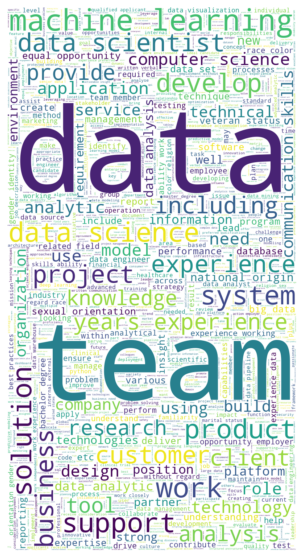

In [85]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()